# Task 1

In [63]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from skimage.transform import hough_line, hough_line_peaks, hough_circle
import skimage.io as io
from skimage.feature import canny
from skimage import data
from skimage.draw import line, line_aa, line_nd
from matplotlib import cm

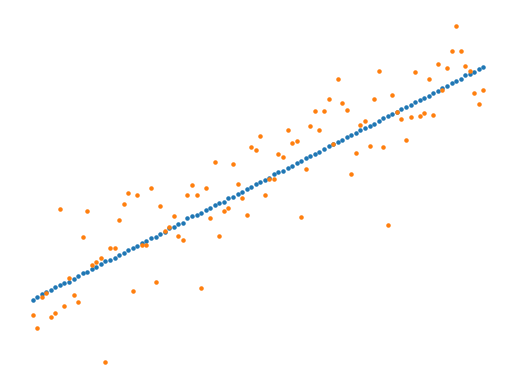

In [51]:
x = np.linspace(0, 1, 100)
y = 5 * x + 4 + np.random.normal(0, 0.01, 100)
y1 = 5 * x + 4 + np.random.normal(0, 0.7, 100)

plt.axis('off')
plt.scatter(x, y, s=5)
plt.scatter(x, y1, s=5)
plt.savefig('img.png')

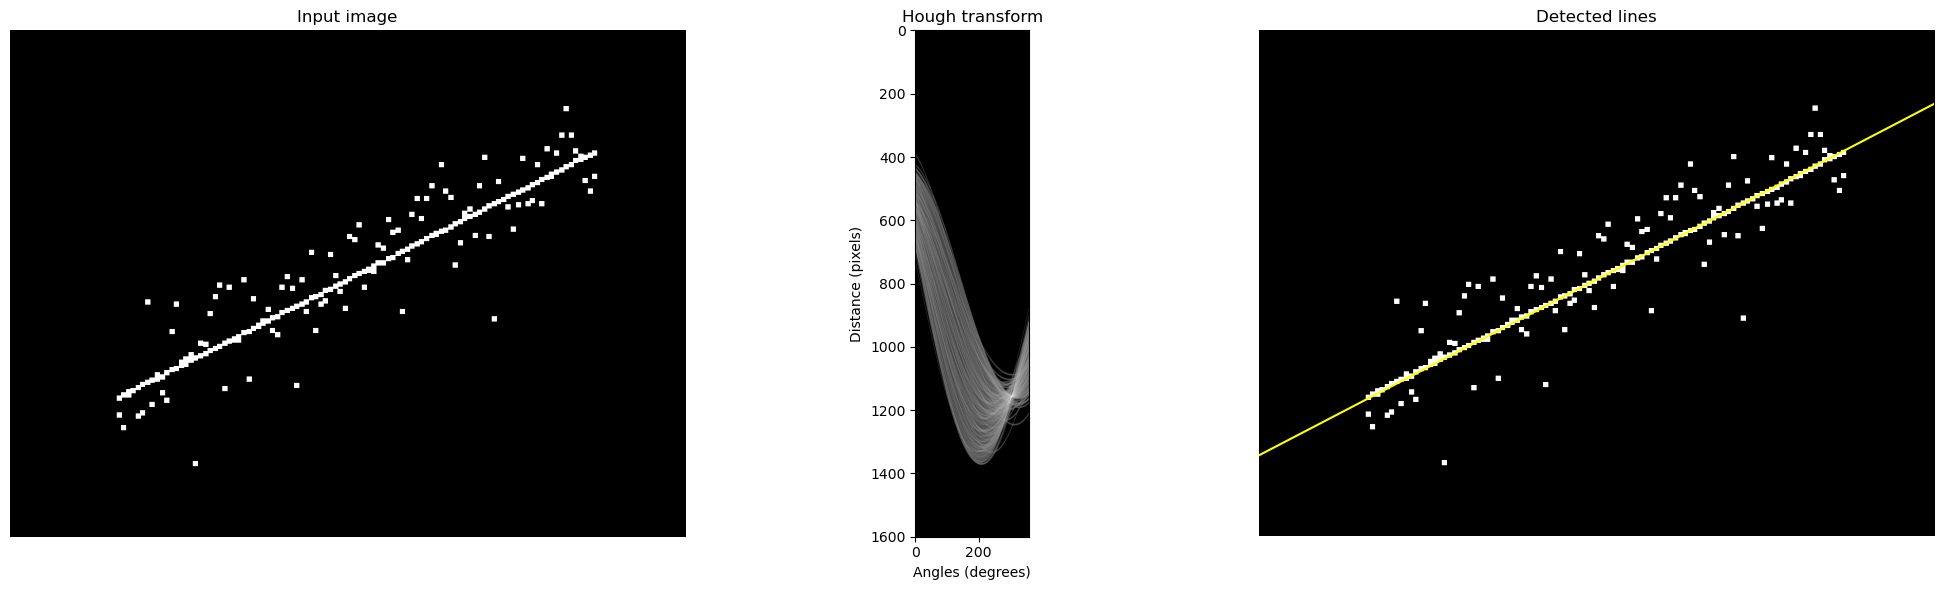

In [58]:
image = io.imread('img.png', as_gray=True,)
for i in range(image.shape[0]):
    for j in range(image.shape[1]):
        if image[i,j] == 1:
            image[i,j] = 0
        else:
            image[i,j] = 1
tested_angles = np.linspace(-np.pi / 2, np.pi / 2, 360, endpoint=False)
h, theta, d = hough_line(image, theta=tested_angles)

# Generating figure 1
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
ax = axes.ravel()

ax[0].imshow(image, cmap=cm.gray)
ax[0].set_title('Input image')
ax[0].set_axis_off()

angle_step = 0.5 * np.diff(theta).mean()
d_step = 0.5 * np.diff(d).mean()
bounds = [np.rad2deg(theta[0] - angle_step),
          np.rad2deg(theta[-1] + angle_step),
          d[-1] + d_step, d[0] - d_step]
ax[1].imshow(np.log(1 + h), cmap=cm.gray)
ax[1].set_title('Hough transform')
ax[1].set_xlabel('Angles (degrees)')
ax[1].set_ylabel('Distance (pixels)')
ax[1].axis('image')

ax[2].imshow(image, cmap=cm.gray)
ax[2].set_ylim((image.shape[0], 0))
ax[2].set_axis_off()
ax[2].set_title('Detected lines')

for _, angle, dist in zip(*hough_line_peaks(h, theta, d)):
    (x0, y0) = dist * np.array([np.cos(angle), np.sin(angle)])
    ax[2].axline((x0, y0), slope=np.tan(angle + np.pi/2), color='yellow')

plt.tight_layout()
plt.show()

# Task 2

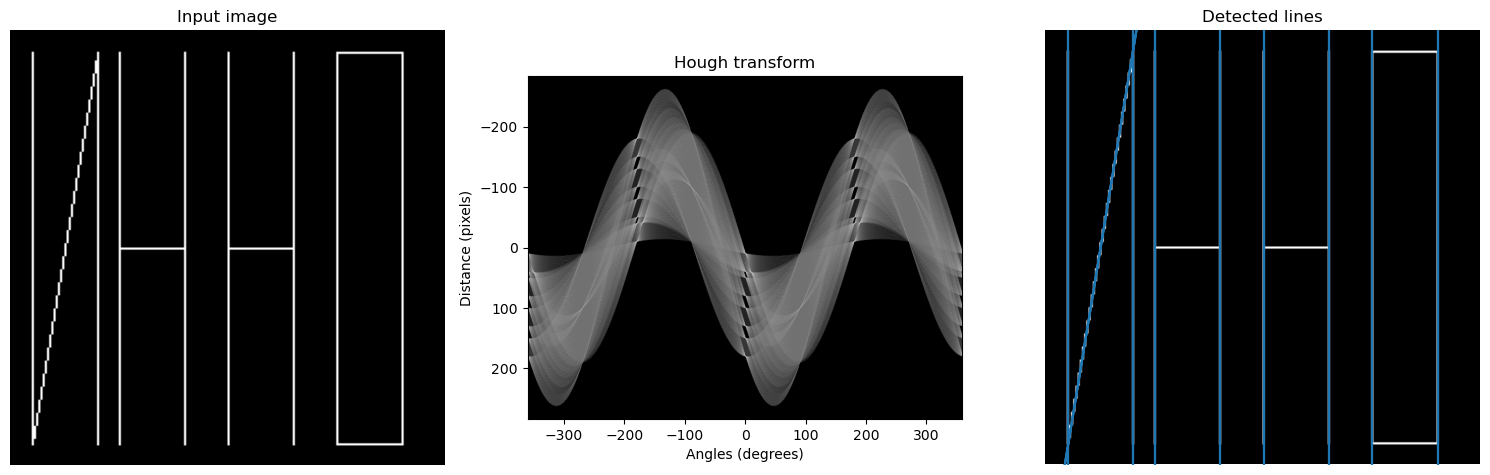

In [75]:
image = np.zeros((200, 200))
image[line(10, 10, 190, 10)] = 255
image[line(190, 10, 10, 40)] = 255
image[line(10, 40, 190, 40)] = 255

image[line(10, 50, 190, 50)] = 255
image[line(100, 50, 100, 80)] = 255
image[line(10, 80, 190, 80)] = 255

image[line(10, 100, 190, 100)] = 255
image[line(100, 100, 100, 130)] = 255
image[line(10, 130, 190, 130)] = 255

image[line(10, 150, 190, 150)] = 255
image[line(10, 150, 10, 180)] = 255
image[line(190, 150, 190, 180)] = 255
image[line(10, 180, 190, 180)] = 255

# Classic straight-line Hough transform
# Set a precision of 0.5 degree.
tested_angles = np.linspace(-2 * np.pi, 2 * np.pi, 1000, endpoint=False)
h, theta, d = hough_line(image, theta=tested_angles)

# Generating figure 1
fig, axes = plt.subplots(1, 3, figsize=(15, 6))
ax = axes.ravel()

ax[0].imshow(image, cmap=cm.gray)
ax[0].set_title('Input image')
ax[0].set_axis_off()

angle_step = 0.5 * np.diff(theta).mean()
d_step = 0.5 * np.diff(d).mean()
bounds = [np.rad2deg(theta[0] - angle_step),
          np.rad2deg(theta[-1] + angle_step),
          d[-1] + d_step, d[0] - d_step]
ax[1].imshow(np.log(1 + h), extent=bounds, cmap=cm.gray, aspect=1 / 1.5)
ax[1].set_title('Hough transform')
ax[1].set_xlabel('Angles (degrees)')
ax[1].set_ylabel('Distance (pixels)')
ax[1].axis('image')

ax[2].imshow(image, cmap=cm.gray)
ax[2].set_ylim((image.shape[0], 0))
ax[2].set_axis_off()
ax[2].set_title('Detected lines')

for _, angle, dist in zip(*hough_line_peaks(h, theta, d)):
    (x0, y0) = dist * np.array([np.cos(angle), np.sin(angle)])
    ax[2].axline((x0, y0), slope=np.tan(angle + np.pi/2))

plt.tight_layout()
plt.show()

As we can see, it does not work very well with horizontal lines. However everthyng else is detected pretty well. 
Since it is not probabilistic algorithm, I do not actually now how to find boundaries of the lines, since
they are defined in polar coordinates by distance and normal